In [1]:
import pandas as pd
from scipy import stats
import numpy as np
from numpy.random import seed
from numpy.random import randn

# Задание 1

Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [2]:
from scipy.stats import mannwhitneyu 
 
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A+stats.norm.rvs(scale=54,loc=11,size=100)

stat, p = mannwhitneyu(A, B, alternative='two-sided')
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p < alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Statistics=4343.000, p=0.109
accept null hypothesis


Ответ: различий в эффекте у пациентов, получающих препарат А, и пациентов, получающих препарат В, нет.

# Задание 2

Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - группа людей без препарата.

B - та же группа людей, но получающая препарат.

In [3]:
from scipy.stats import wilcoxon

np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A+stats.norm.rvs(scale=54,loc=11,size=100)

stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Statistics=1930.000, p=0.041
reject null hypothesis


Ответ: различия в эффекте у пациентов, получающих препарат и не получающих его, присутствуют.

# Задание 3

Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой?

In [4]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [5]:
from scipy.stats import f_oneway

F, p = f_oneway(water, nutri, mineral)

alpha = 0.05 
print(F, p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

12.525963044834192 2.9240047906326866e-05
Different distribution (reject H0)


In [6]:
fvalue, pvalue = f_oneway(nutri, mineral)
fvalue, pvalue

(18.128724672228838, 0.0001213673340124552)

In [7]:
fvalue, pvalue = f_oneway(water, nutri)
fvalue, pvalue

(17.075344953751724, 0.0001840453200503372)

In [8]:
fvalue, pvalue = f_oneway(water, mineral)
fvalue, pvalue

(0.010260999552998775, 0.9198340218471527)

Ответ: по сравнению с минералкой и водой эффект от удобрения есть.

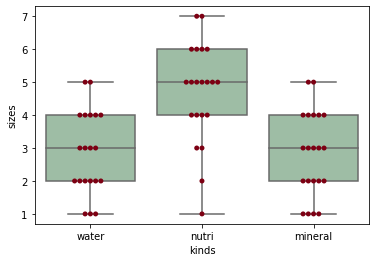

In [9]:
import seaborn as sns

sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri) + ['mineral']*len(mineral)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')

# Задание 4

In [10]:
cookie_cats = 'cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [11]:
# Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Вывод: в тестовой группе на 789 игроков больше, чем в контрольной.

<AxesSubplot:>

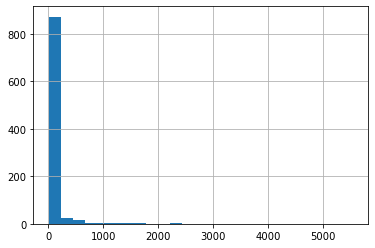

In [12]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=25)

Вывод: подавляющее количество игроков не привысили в общей сумме 200 раундов.

Text(0.5, 0, '# Game rounds')

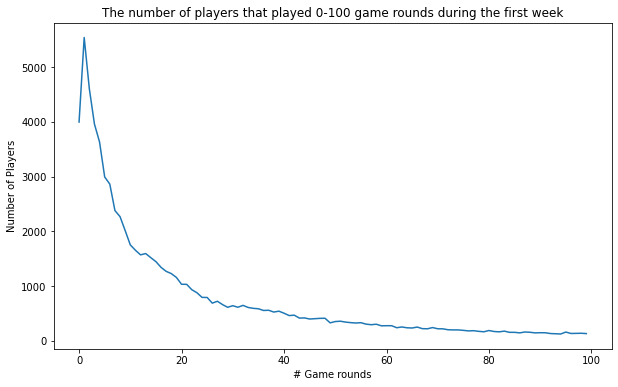

In [13]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

Вывод: в течение первой недели рост игроков наблюдается только до 3-4 игровых раундов, далее распределение представляет собой график убывающей показательной функции.

<AxesSubplot:ylabel='Density'>

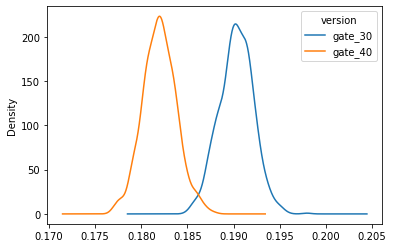

In [14]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [15]:
# Two Sample T-Test:
t_stat, p_val= stats.ttest_ind(boot_1d.gate_30, boot_1d.gate_40)
print('t_stat=%.3f, p=%.3f' % (t_stat, p_val))

alpha = 0.05
if p_val < alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t_stat=101.435, p=0.000
reject null hypothesis


Вывод: согласно результатам исследования, в т.ч. и AB-теста, в целом игроки предпочитают около 20 игровых раундов, но при этом количество возвращений как через 1 день, так и через 7 дней превышает у контрольной группы. Таким образом, рекомендуется вернуть первые ворота на 30 уровень.